# Predictive Analytics

### Importing the Datasets and the libraries needed for the prediction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

feature_set = pd.read_pickle("Data/feature_set.pickle")
feature_set_daily = pd.read_pickle("Data/feature_set_daily.pickle")

In [3]:
feature_set.head()

,day,hour,trips,minutes_driven,max_temp,precip,is_weekday
0,2018-01-01,0,25.0,738.0,14.4,0.0,1
1,2018-01-01,1,24.0,1171.0,14.4,0.0,1
2,2018-01-01,2,12.0,232.0,14.4,0.0,1
3,2018-01-01,3,3.0,41.0,14.4,0.0,1
4,2018-01-01,4,5.0,1463.0,14.4,0.0,1


In [4]:
feature_set_daily.head()

,day,trips,minutes_driven,max_temp,precip,hours_of_precip,is_weekday
0,2018-01-01,779.0,51257.0,13.8,0.0,0.0,1
1,2018-01-02,777.0,22620.0,16.9,0.0,0.0,1
2,2018-01-03,722.0,23774.0,12.1,0.0,0.0,1
3,2018-01-04,643.0,26426.0,13.8,0.0,0.0,0
4,2018-01-05,711.0,18398.0,14.1,1.0,2.0,1


### Linear Regression as a Benchmark
Since linear regression is the most naive approach, we can use it as a benchmark for the more complex models. First, we need to split our dataset into training and test datasets. Since we wanted to make our result reproducible, we chose a specific random state. random_state 9626 was chosen because it splits the dataset into heterogeneous subsets. This is important because we have very few data points that relate to, for example, a day with precipitation. If these days are unevenly represented in the training set, we cannot accurately predict demand on these days.

In [5]:
X = feature_set["max_temp"]
y = feature_set["trips"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9626)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=9626) 

# Wir unterteilen aktuell nur in train & test set! eigentlich sollte man mit train test und val set arbeiten (val-set zum finden von hyperparametern)!

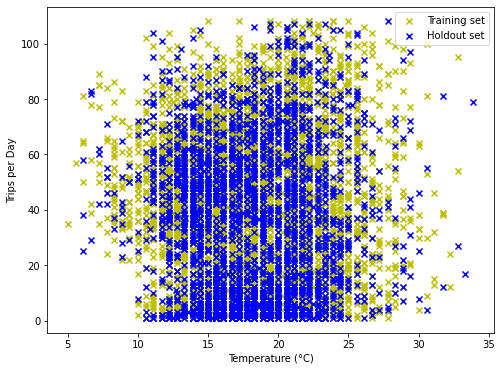

In [6]:
plt.figure(figsize = (8,6))
plt.scatter(X_train, y_train, marker='x', color="y")
plt.scatter(X_test, y_test, marker='x', color="b")
#plt.scatter(X_val, y_val, marker='x', color="r")
plt.xlabel("Temperature (°C)")
plt.ylabel("Trips per Day")
plt.legend(['Training set', 'Holdout set'])
plt.show()

In [7]:
model = LinearRegression(fit_intercept =True)
model.fit(X_train.values.reshape(-1,1),y_train)
model_pred = model.predict(X_test.values.reshape(-1,1))

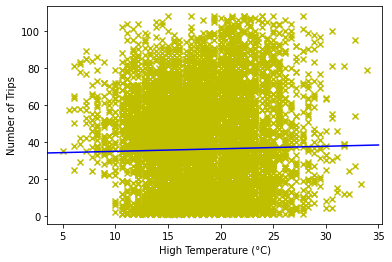

Coefficients  [0.1372968] 
Intercept  33.499125609782574


In [8]:
plt.scatter( X,y, marker = 'x', c='y')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

Z = np.linspace(0,35)
T = model.intercept_ + model.coef_*Z

plt.plot(Z,T, c="b")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("High Temperature (°C)")
plt.ylabel("Number of Trips")
plt.show()
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

In [9]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, model_pred))
print("MAE:", mean_absolute_error(y_test, model_pred))
print("R2: ", r2_score(y_test, model_pred))

Test set performance:
MSE: 732.2340830171262
MAE: 23.2810418776445
R2:  -0.0003549646189333622


As expected (Data_Visualization), the linear model cant describe the demand with the feature temperature.

##### Demand on a daily basis (for comparison)

In [10]:
X_daily = feature_set_daily["max_temp"]
y_daily = feature_set_daily["trips"]
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.3, random_state=9626) 

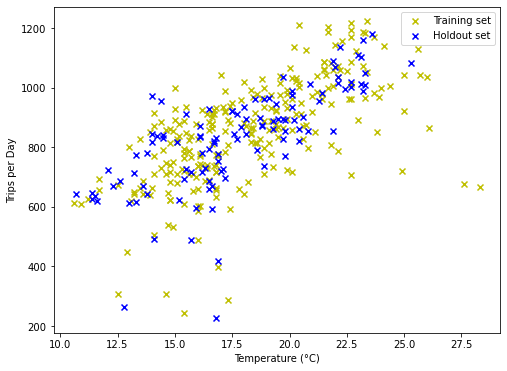

In [11]:
plt.figure(figsize = (8,6))
plt.scatter(X_train_daily, y_train_daily, marker='x', color="y")
plt.scatter(X_test_daily, y_test_daily, marker='x', color="b")
plt.xlabel("Temperature (°C)")
plt.ylabel("Trips per Day")
plt.legend(['Training set', 'Holdout set'])
plt.show()

In [12]:
model = LinearRegression(fit_intercept =True)
model.fit(X_train_daily.values.reshape(-1,1),y_train_daily)
model_pred = model.predict(X_test_daily.values.reshape(-1,1))

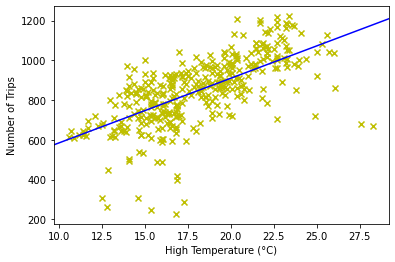

Coefficients  [32.5773347] 
Intercept  257.9426186755903


In [13]:
plt.scatter( X_daily,y_daily, marker = 'x', c='y')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

Z = np.linspace(0,35)
T = model.intercept_ + model.coef_*Z

plt.plot(Z,T, c="b")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("High Temperature (°C)")
plt.ylabel("Number of Trips")
plt.show()
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

In [14]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test_daily, model_pred))
print("MAE:", mean_absolute_error(y_test_daily, model_pred))
print("R2: ", r2_score(y_test_daily, model_pred))

Test set performance:
MSE: 14144.245708949607
MAE: 80.92840062690289
R2:  0.5155186255741276


As we can see, the performance improves significantly when the time of day is no longer considered. Further, the positive linear relationship between the number of trips and the maximum temperature becomes observable. If we exclude other features, we could improve our test performance even more. 

In [15]:
X_daily = feature_set_daily["hours_of_precip"]
y_daily = feature_set_daily["trips"]
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.3, random_state=9626) 

In [16]:
model = LinearRegression(fit_intercept =True)
model.fit(X_train_daily.values.reshape(-1,1),y_train_daily)
model_pred = model.predict(X_test_daily.values.reshape(-1,1))

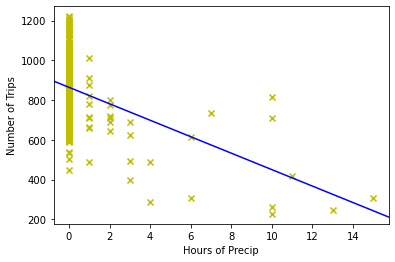

Coefficients  [-41.44260578] 
Intercept  864.3918403200221


In [17]:
plt.scatter( X_daily,y_daily, marker = 'x', c='y')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

Z = np.linspace(-1,16)
T = model.intercept_ + model.coef_*Z

plt.plot(Z,T, c="b")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("Hours of Precip")
plt.ylabel("Number of Trips")
plt.show()
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

In [18]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test_daily, model_pred))
print("MAE:", mean_absolute_error(y_test_daily, model_pred))
print("R2: ", r2_score(y_test_daily, model_pred))

Test set performance:
MSE: 19863.300979477463
MAE: 113.34245688250421
R2:  0.31962442132330016


Since there is also a negative linear relationship between precipitation hours and demand, we could improve performance by excluding these days. 

In [19]:
no_precip = feature_set_daily[feature_set_daily["precip"]==0]
X_daily = no_precip["max_temp"]
y_daily = no_precip["trips"]
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.3, random_state=9626) 

In [20]:
model = LinearRegression(fit_intercept =True)
model.fit(X_train_daily.values.reshape(-1,1),y_train_daily)
model_pred = model.predict(X_test_daily.values.reshape(-1,1))

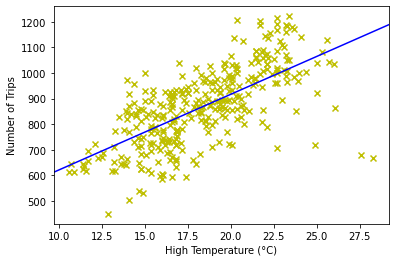

Coefficients  [29.60478087] 
Intercept  324.37394752313605


In [21]:
plt.scatter( X_daily,y_daily, marker = 'x', c='y')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

Z = np.linspace(9,30)
T = model.intercept_ + model.coef_*Z

plt.plot(Z,T, c="b")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("High Temperature (°C)")
plt.ylabel("Number of Trips")
plt.show()
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

In [22]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test_daily, model_pred))
print("MAE:", mean_absolute_error(y_test_daily, model_pred))
print("R2: ", r2_score(y_test_daily, model_pred))

Test set performance:
MSE: 9415.225927098923
MAE: 79.63124091263273
R2:  0.5520256194724142


As we can see, the linear model fits the data even better if we exclude the days with precipitation. However, this method is not suitable to improve the prediction accuracy in general, since we lose valuable information. Therefore, we need to consider these features when training to improve performance.

### Multiple feature analysis

In [23]:
X = feature_set[["max_temp","precip","is_weekday","hour"]]
y = feature_set["trips"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9626)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=9626)

In [24]:
model = LinearRegression( normalize=True)
model.fit(X_train,y_train)
model_pred = model.predict(X_test)
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

Coefficients  [ -0.57139787 -15.85864019   0.29786265   1.79945832] 
Intercept  25.159399611339257


In [25]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, model_pred))
print("MAE:", mean_absolute_error(y_test, model_pred))
print("R2: ", r2_score(y_test, model_pred))

Test set performance:
MSE: 584.6096773664058
MAE: 20.106339411186156
R2:  0.20132481308702133


As we can see, the R2 value is still quite low. This can be explained by the non-linearity of the relationships (e.g. time of day)

### Polynomial Regression
Often one encounters data where the relationship between the feature(s) and the dependet variable is not best described by a straight line, but by a polynomial regression. Therefore, it is of interest for which degree of polyinomial the model fits the data best.

In [26]:
# Polynomial regression with degree 1 ( equivalent to linear regression)
X = feature_set[["max_temp","precip","is_weekday","hour"]]
y = feature_set["trips"]
poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)

In [27]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
print("Coefficients ", poly_reg_model.coef_, "\nIntercept ", poly_reg_model.intercept_ )

Coefficients  [ -0.52812873 -16.51755145   0.42438094   1.79541759] 
Intercept  24.25141482064792


In [28]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, poly_reg_y_predicted))
print("MAE:", mean_absolute_error(y_test, poly_reg_y_predicted))
print("R2: ", r2_score(y_test, poly_reg_y_predicted))

Test set performance:
MSE: 584.5231131829771
MAE: 20.109179759811838
R2:  0.20144307432705288


Find degree d at which the model performs the best.

Text(0, 0.5, 'Mean squared error')

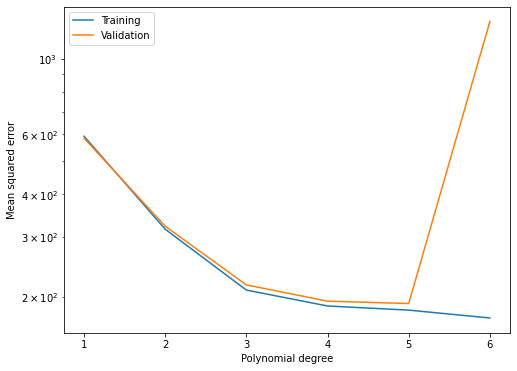

In [29]:
err_train = []
err_cv = []

for degree in range(1,7):

    # fit model
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_train, y_train)

    # compute errors
    err_train.append(mean_squared_error(poly_reg_model.predict(X_train), y_train))
    err_cv.append(mean_squared_error(poly_reg_model.predict(X_test), y_test))

plt.figure(figsize = (8,6))
plt.semilogy(range(1,7), err_train, range(1, 7), err_cv)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

In [30]:
# Polynomial regression with optimal degree (5)
X = feature_set[["max_temp","precip","is_weekday","hour"]]
y = feature_set["trips"]
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)

In [31]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
print("Coefficients ", poly_reg_model.coef_, "\nIntercept ", poly_reg_model.intercept_ )

Coefficients  [ 3.16860452e+01  2.35920768e+03  3.87569321e+00 -3.35321183e+01
 -4.35726805e+00 -7.86454577e+02 -2.23226617e+00  1.40560739e+00
  2.35920757e+03  2.34057317e+00 -3.50229186e+01  3.87576909e+00
  3.83337580e+00  5.10952611e+00  2.55317033e-01  1.03484620e+02
  2.39333370e-01 -1.90722459e-03 -7.86454593e+02  1.02029582e+01
  6.00802275e+00 -2.23230607e+00  1.24231215e-01 -2.11989456e-01
  2.35920752e+03  2.34056806e+00 -3.50229252e+01  2.34056801e+00
 -1.75017564e+01  3.90343199e+00  3.87574403e+00  3.83336713e+00
 -1.00047644e+00 -1.52816287e-01 -6.79726432e-03 -6.68783066e+00
 -1.12331460e-02 -6.64924471e-04  1.03484618e+02 -3.14071984e+00
 -3.99698348e-01  2.39333785e-01 -2.12225694e-02  2.86337748e-03
 -7.86454593e+02  1.02029576e+01  6.00802291e+00  1.02029576e+01
  6.13767653e+00 -6.52761840e-01 -2.23230615e+00  1.24231200e-01
  3.15044288e-02  8.30018840e-03  2.35920752e+03  2.34056788e+00
 -3.50229252e+01  2.34056788e+00 -1.75017565e+01  3.90343218e+00
  2.3405678

In [32]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, poly_reg_y_predicted))
print("MAE:", mean_absolute_error(y_test, poly_reg_y_predicted))
print("R2: ", r2_score(y_test, poly_reg_y_predicted))

Test set performance:
MSE: 190.69446460894855
MAE: 10.2221177301488
R2:  0.7394792747001242


As we can see the perfomrance increased significantly.

### LASSO regression ($L_1$ regularization)
We can also illustrate the effects of regularization as they relate to training and validation performance.  Just as we did with the degree of the polynomial, we can consider the training and validation errors for different amounts of regularization.

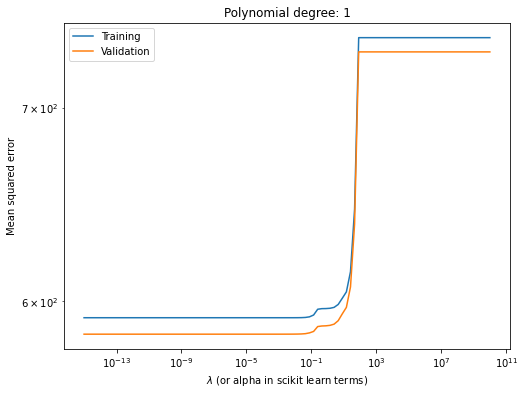

Validation error is minimal for regularization parameter alpha≈0.0000.

Coefficients  [ -0.52812873 -16.51755145   0.42438094   1.79541759] 
Intercept  24.251414820647888

Test set performance:
MSE: 584.5231131829771
MAE: 20.109179759811834
R2:  0.20144307432705288


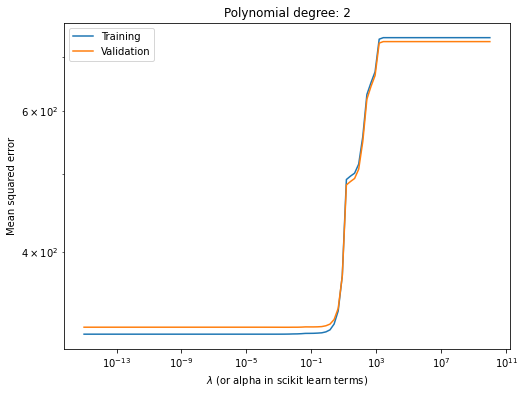

Validation error is minimal for regularization parameter alpha≈0.0024.

Coefficients  [ -0.6956854   15.91813107  -0.06754912  12.62523221   0.07153887
  -0.37851628   0.33394771  -0.07695862   0.80383687 -10.81539839
  -1.10768029  -3.35861371  -0.18757434  -0.40743975] 
Intercept  -32.378198979694844

Test set performance:
MSE: 321.8247542367049
MAE: 14.706258297150699
R2:  0.560333234815531


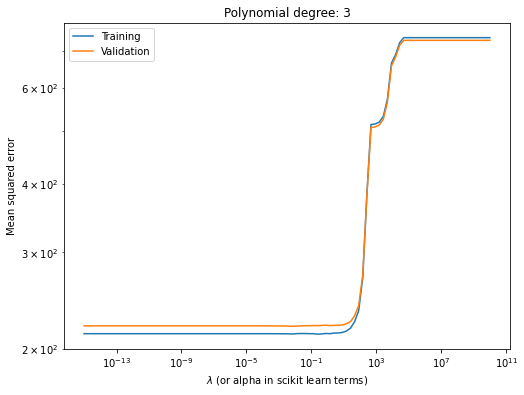

Validation error is minimal for regularization parameter alpha≈0.0076.

Coefficients  [-7.02512413e+00 -0.00000000e+00  1.41575094e+01  1.31045751e+00
  3.64466606e-01  2.92031229e+00  3.57777488e+00  6.83413042e-02
  0.00000000e+00 -0.00000000e+00  3.98030304e-01 -0.00000000e+00
  5.15058493e+00  6.76494791e-01 -4.54131645e-03 -3.96090576e-02
 -7.18060653e-02 -6.53267072e-03 -9.29827033e-01 -7.78585303e-01
 -1.86812113e-01 -1.57163582e+00  8.18495006e-02  7.36416231e-03
 -0.00000000e+00 -0.00000000e+00 -2.97162343e+00 -0.00000000e+00
  3.25384421e-01  1.99895014e-01 -2.32416596e+01 -6.50268816e+00
 -2.06510673e-02 -3.53554526e-02] 
Intercept  29.96634967180956

Test set performance:
MSE: 219.80854275844342
MAE: 11.666785142942862
R2:  0.6997045451530572


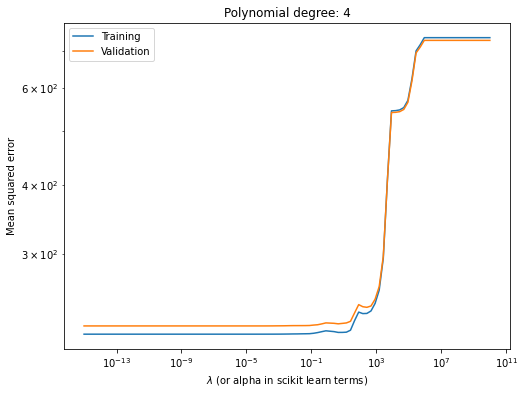

Validation error is minimal for regularization parameter alpha≈0.0000.

Coefficients  [-2.03861641e+00 -9.82379597e+01 -2.62626958e+01  4.11922411e+00
  2.04221193e-01 -5.17805594e-01 -6.09066475e-01 -8.19379317e-02
  2.61476677e+01 -1.70634833e+01  7.85539276e-01  1.09674227e+01
  1.41113462e+00  3.84637942e-01 -3.30848629e-03 -3.66516009e-01
 -1.25474003e-01 -8.76505065e-03  3.97315938e-01 -7.51519428e-02
 -4.50841700e-02  2.27546098e+00  3.38354597e-02  8.61583717e-03
  4.59943297e+01 -2.03806009e+01 -1.31950754e+00  1.46085074e+01
 -4.14162286e+00 -1.06116466e-01 -2.14295094e+01 -4.02443783e+00
 -2.05999198e-02 -1.25391476e-02 -9.59220005e-06  3.26141977e-03
 -1.90804954e-03  6.57691051e-05  1.24734879e-01  2.13803071e-02
  1.03988175e-02  1.31129196e-01  3.15708454e-03  3.86155919e-04
  1.19853458e+00  9.44254019e-01  1.21122803e-02 -1.53903740e-01
 -1.42690025e-01 -6.59465020e-03 -5.40534498e-01  7.28776736e-03
 -4.11569927e-03 -4.30812026e-04  5.33802077e+01  7.22459282e+00
  1.

KeyboardInterrupt: 

In [33]:
ideal_r2_score_lasso = 0
ideal_degree_lasso = 1
ideal_alpha_lasso = 0
    
for degree in range(1,7):

    # fit model
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)
    
    err_train = []
    err_cv = []
    
    ideal_r2_score = 0
    
    for alpha in np.logspace(-15,10,100):
    
        # fit model
        model_L1 = Lasso(alpha = alpha)
        model_L1.fit(X_train, y_train)
    
        # compute errors
        err_train.append(mean_squared_error(model_L1.predict(X_train), y_train))
        
        prediction = model_L1.predict(X_test)
        err_cv.append(mean_squared_error(prediction, y_test))
        
       
        
        if(r2_score(y_test, prediction) > ideal_r2_score):
            ideal_r2_score = r2_score(y_test, prediction)
            ideal_alpha = alpha
    
    #Plot errors
    plt.figure(figsize = (8,6))
    plt.loglog(np.logspace(-15,10,100), err_train, np.logspace(-15,10,100), err_cv)
    plt.title(f"Polynomial degree: {degree}")
    plt.legend(["Training", "Validation"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()
    
    print(f"Validation error is minimal for regularization parameter alpha≈{ideal_alpha:.4f}.")
    
    # fit with ideal para
    model_L1 = Lasso(alpha = ideal_alpha)
    model_L1.fit(X_train, y_train)
    prediction = model_L1.predict(X_test)
    print("\nCoefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )
    
    print("\nTest set performance:")

    print("MSE:", mean_squared_error(y_test, prediction))
    print("MAE:", mean_absolute_error(y_test, prediction))
    print("R2: ", r2_score(y_test, prediction))
    
    if(ideal_r2_score > ideal_r2_score_lasso): 
        ideal_r2_score_lasso = ideal_r2_score
        ideal_degree_lasso = degree
        ideal_alpha_lasso = ideal_alpha

As we can see, the performance did not improve much from degree 3. With a higher degree, the performance would probably still increase, but it would require much more computing power.

In [ ]:
print("Ideal hyperparameters for LASSO regression:")
print(f"Degree of polynomial: {ideal_degree_lasso}")
print(f"Regularization parameter alpha: {ideal_alpha_lasso:.4f}")

In [ ]:
poly = PolynomialFeatures(degree=ideal_degree_lasso, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)

In [ ]:
model_L1 = Lasso(alpha = ideal_alpha_lasso)
model_L1.fit(X_train, y_train)
prediction = model_L1.predict(X_test)
print("Coefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )

In [ ]:
print("Test set performance for ideal hyperparameters:")

print("MSE:", mean_squared_error(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))
print("R2: ", r2_score(y_test, prediction))

### Ridge regression ($L_2$ Regularization)

We can also illustrate the effects of regularization as they relate to training and validation performance.  Just as we did with the degree of the polynomial, we can consider the training and validation errors for different amounts of regularization.

In [ ]:
ideal_r2_score_ridge = 0
ideal_degree_ridge = 0
ideal_alpha_ridge = 0
    
for degree in range(1,6):

    # fit model
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)
    
    err_train = []
    err_cv = []
    
    ideal_r2_score = 0
    
    for alpha in np.logspace(-15,10,100):
    
        # fit model
        model_L2 = Ridge(alpha = alpha, normalize = True, solver = 'lsqr') # select least squares regression as solver
        model_L2.fit(X_train, y_train)
    
        # compute errors
        err_train.append(mean_squared_error(model_L2.predict(X_train), y_train))
        
        prediction = model_L2.predict(X_test)
        err_cv.append(mean_squared_error(prediction, y_test))
        
       
        
        if(r2_score(y_test, prediction) > ideal_r2_score):
            ideal_r2_score = r2_score(y_test, prediction)
            ideal_alpha = alpha
    
    #Plot errors
    plt.figure(figsize = (8,6))
    plt.loglog(np.logspace(-15,10,100), err_train, np.logspace(-15,10,100), err_cv)
    plt.title(f"Polynomial degree: {degree}")
    plt.legend(["Training", "Validation"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()
    
    print(f"Validation error is minimal for regularization parameter alpha≈{ideal_alpha:.4f}.")
    
    # fit with ideal para
    model_L2 = Ridge(alpha = ideal_alpha, normalize = True, solver = 'lsqr')
    model_L2.fit(X_train, y_train)
    prediction = model_L2.predict(X_test)
    print("\nCoefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )
    
    print("\nTest set performance:")

    print("MSE:", mean_squared_error(y_test, prediction))
    print("MAE:", mean_absolute_error(y_test, prediction))
    print("R2: ", r2_score(y_test, prediction))
    
    if(ideal_r2_score > ideal_r2_score_ridge): 
        ideal_r2_score_ridge = ideal_r2_score
        ideal_degree_ridge = degree
        ideal_alpha_ridge = ideal_alpha

In [ ]:
print("Ideal hyperparameters for ride regression:")
print(f"Degree of polynomial: {ideal_degree_ridge}")
print(f"Regularization parameter alpha: {ideal_alpha_ridge:.4f}")

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)

In [ ]:
model_L2 = Ridge(alpha = 0, normalize = True, solver = 'lsqr')
model_L2.fit(X_train, y_train)
prediction = model_L2.predict(X_test)
print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )

In [ ]:
print("Test set performance for ideal hyperparameters:")

print("MSE:", mean_squared_error(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))
print("R2: ", r2_score(y_test, prediction))

### Tree Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor

X = feature_set[["max_temp","precip","is_weekday","hour"]]
Y = feature_set["trips"]

# Do a 70-30 split first
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.3,random_state=34 )

# now split X_train to achive 50-20-30 split
x_train2, x_hold2, y_train2, y_hold2 = train_test_split(x_train2, y_train2, test_size=(0.2/0.7),random_state=34 )

def find_tree_depth (x,y):
    
    # define list for collecting results
    err_train = [] 
    err_test  = []
    
    # split data
    # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)
    
    #loop over max_depth
    
    for n in np.arange(1,21): # lets test until 24 for now
        
        # fit model
        
        tree_reg = DecisionTreeRegressor(max_depth=n)
        tree_model = tree_reg.fit(x_train2,y_train2)
        
        # compute errors
        
        err_train.append(mean_absolute_error(y_train2, tree_model.predict(x_train2)))
        err_test.append(mean_absolute_error(y_hold2, tree_model.predict(x_hold2)))


    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,21), err_train,np.arange(1,21), err_test)
    plt.legend(["Training", "Holdout"])
    plt.xlabel("Max Tree Depth")
    plt.ylabel("MAE")
    plt.title("Search over max_depth parameter",fontsize=14)
    plt.show()

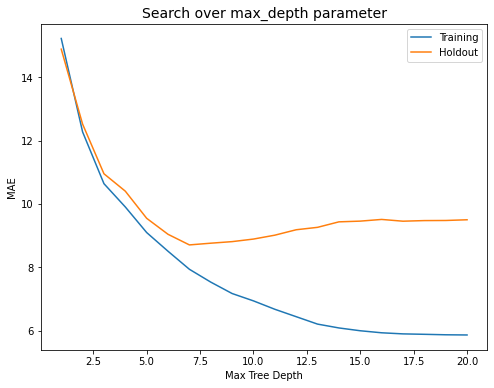

In [36]:
find_tree_depth (X,Y)

In [43]:
# Fit regression model
Tree_reg   = DecisionTreeRegressor(max_depth=7)
tree_model = Tree_reg.fit(x_train2, y_train2) 

# Predict
y_hat_tree = tree_model.predict(x_test2)

print("MAE:",mean_absolute_error(y_hat_tree, y_test2), "Bikes")
print("RMSE:",(mean_squared_error(y_hat_tree, y_test2))**(0.5), "Bikes")  
print("R2:",r2_score(y_hat_tree, y_test2))

MAE: 8.483621513503389 Bikes
RMSE: 12.275858814314637 Bikes
R2: 0.7523114768329845
